In [2]:
pip install pandas matplotlib yfinance


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
# Define the stock tickers and the time period
tickers = ['AAPL', 'GOOG', 'MSFT', 'TSLA', 'META', '^IXIC', '^GSPC']
start_date = '2015-01-01'
end_date = '2025-01-01'

# Fetch historical data for each stock
data = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%***********************]  7 of 7 completed


In [5]:
all_tickers = tickers


In [6]:
stocks = ['AAPL', 'GOOG', 'MSFT', 'TSLA', 'META']

# Historical Stock Prices

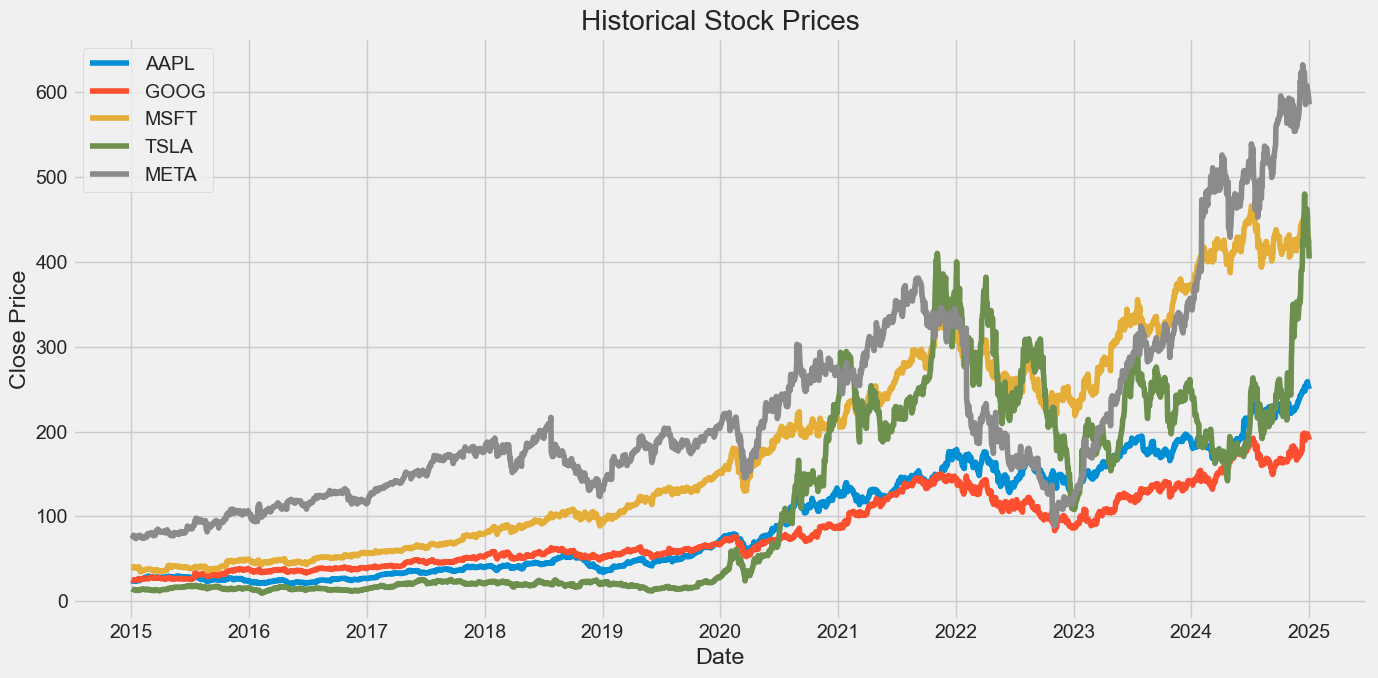

In [7]:
# Plot the data
plt.figure(figsize=(14, 7))

# Define colors and line styles for each stock
colors = ['blue', 'green', 'red', 'purple', 'orange']

for ticker in stocks:
    plt.plot(data.index, data[ticker], label=ticker)

# Add title and labels
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.tight_layout()

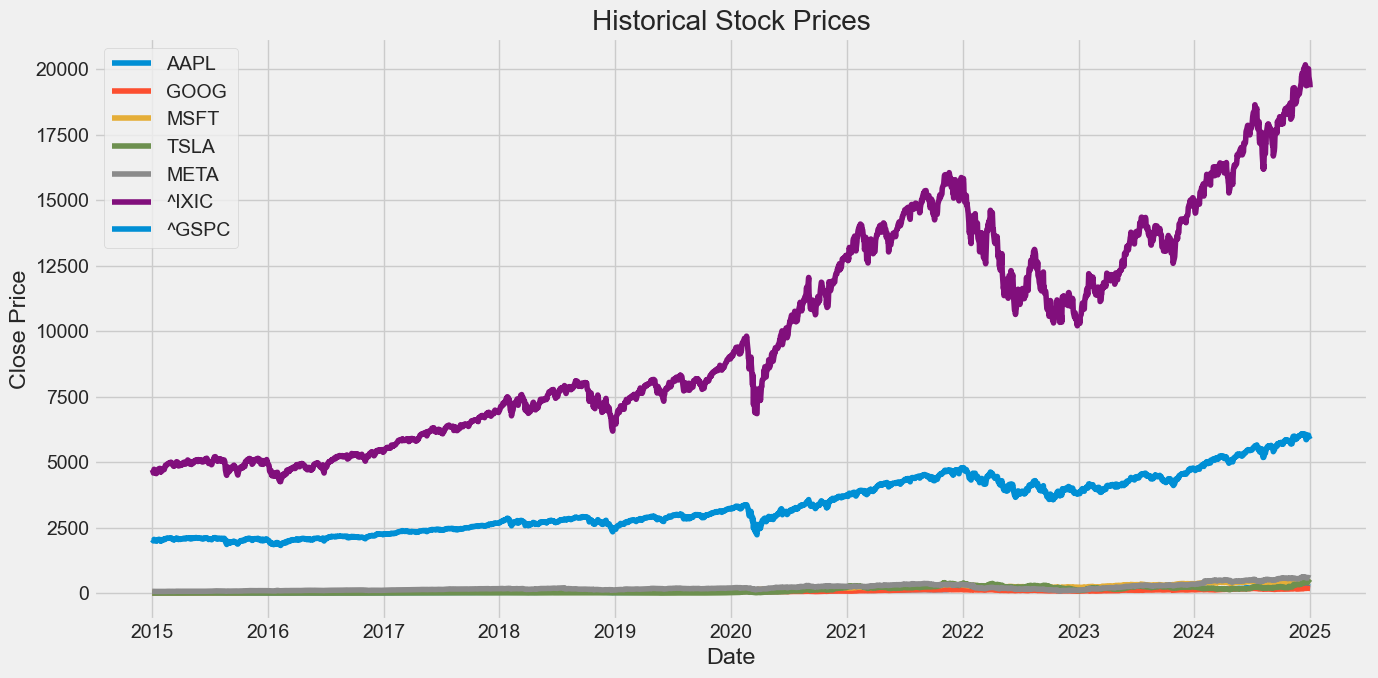

In [8]:
# Plot the data
plt.figure(figsize=(14, 7))

# Define colors and line styles for each stock
colors = ['blue', 'green', 'red', 'purple', 'orange']

for ticker in all_tickers:
    plt.plot(data.index, data[ticker], label=ticker)

# Add title and labels
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.tight_layout()

# Trading Volume of Stocks

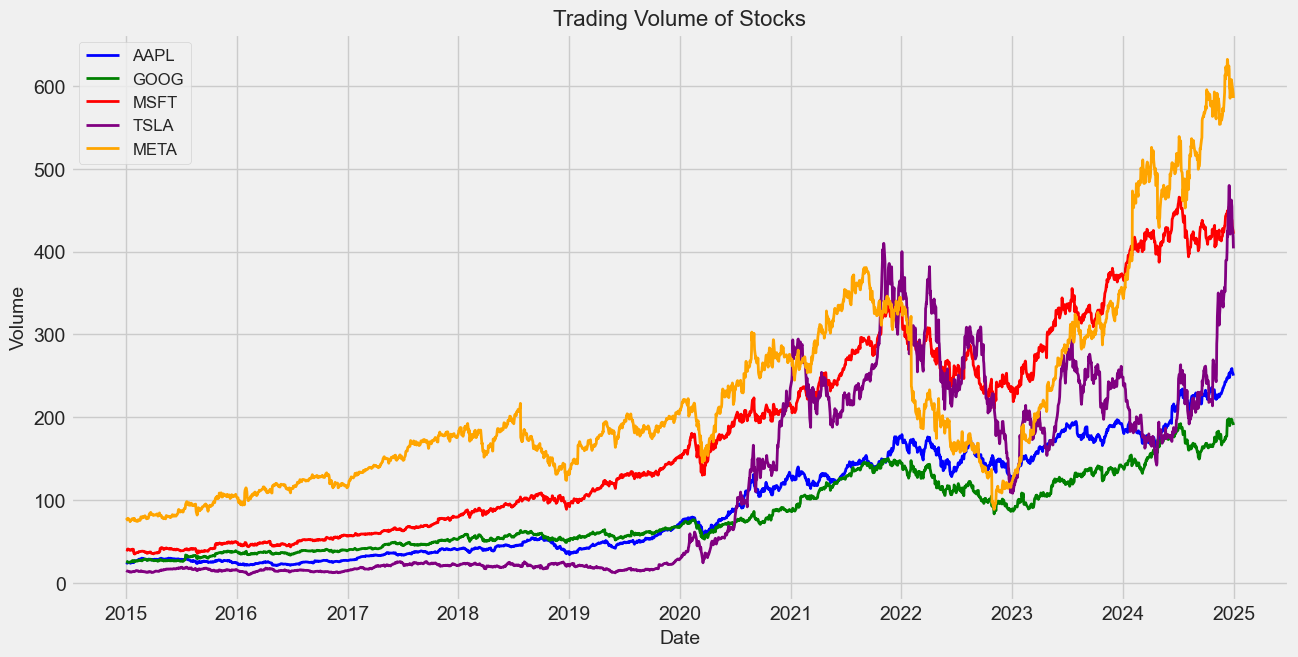

In [9]:
# Plot the data
plt.figure(figsize=(14, 7))

# Define colors and line styles for each stock
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot volume for each stock with custom colors and line styles
for i, ticker in enumerate(stocks):
    plt.plot(data.index, data[ticker], label=ticker, color=colors[i], linewidth=2)

# Add title and labels
plt.title('Trading Volume of Stocks', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

# Moving averages

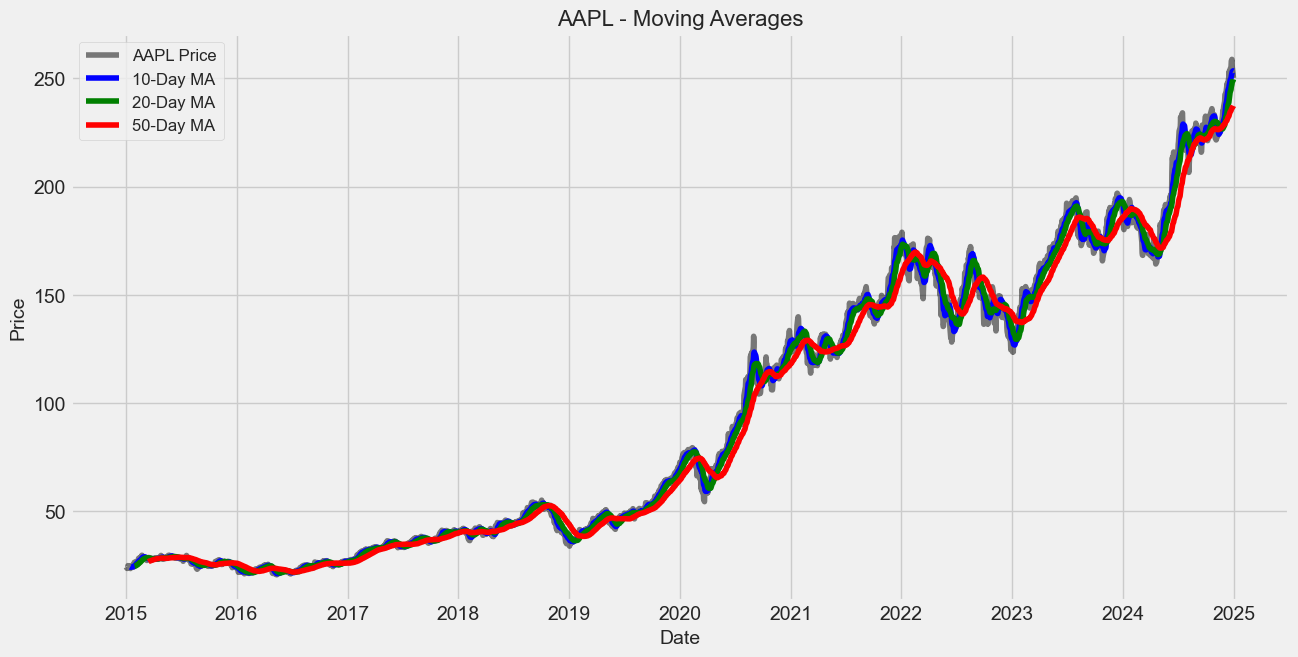

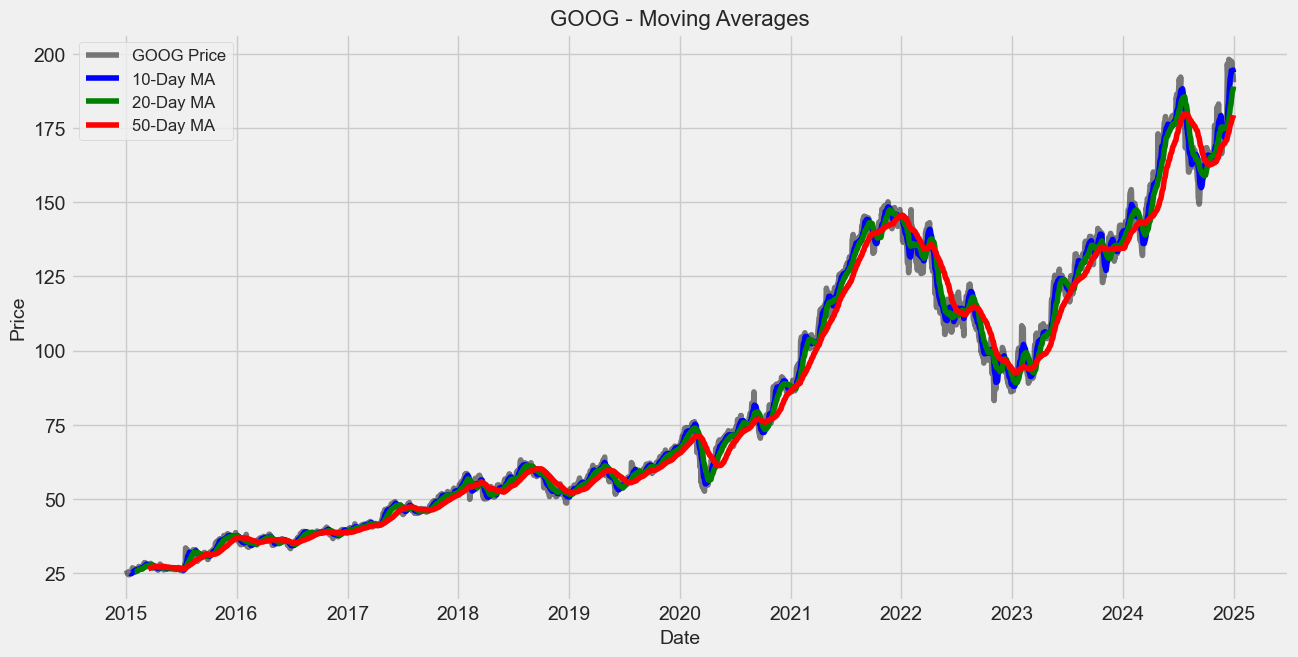

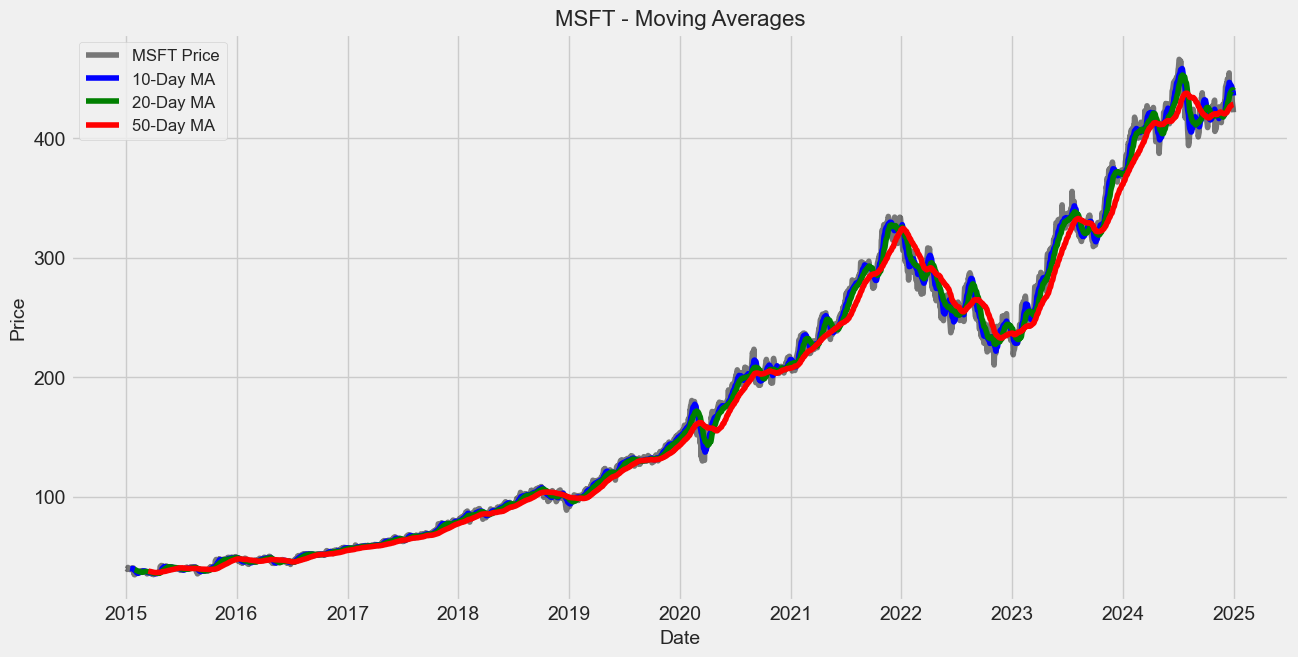

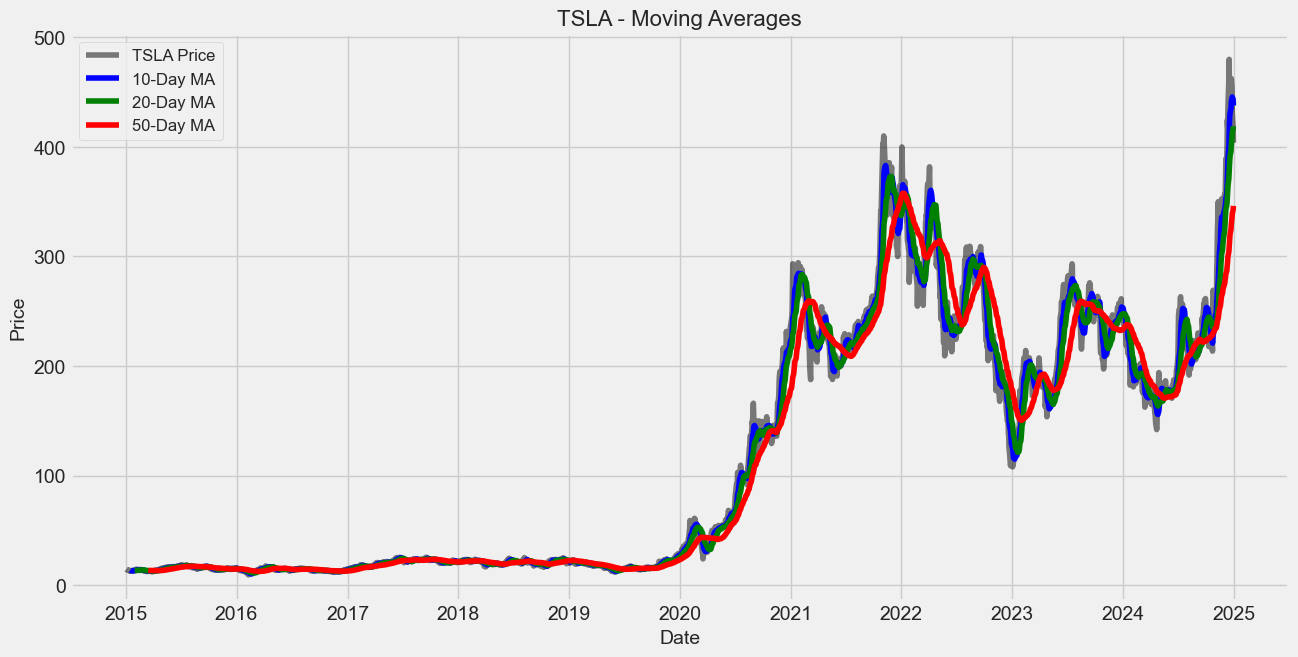

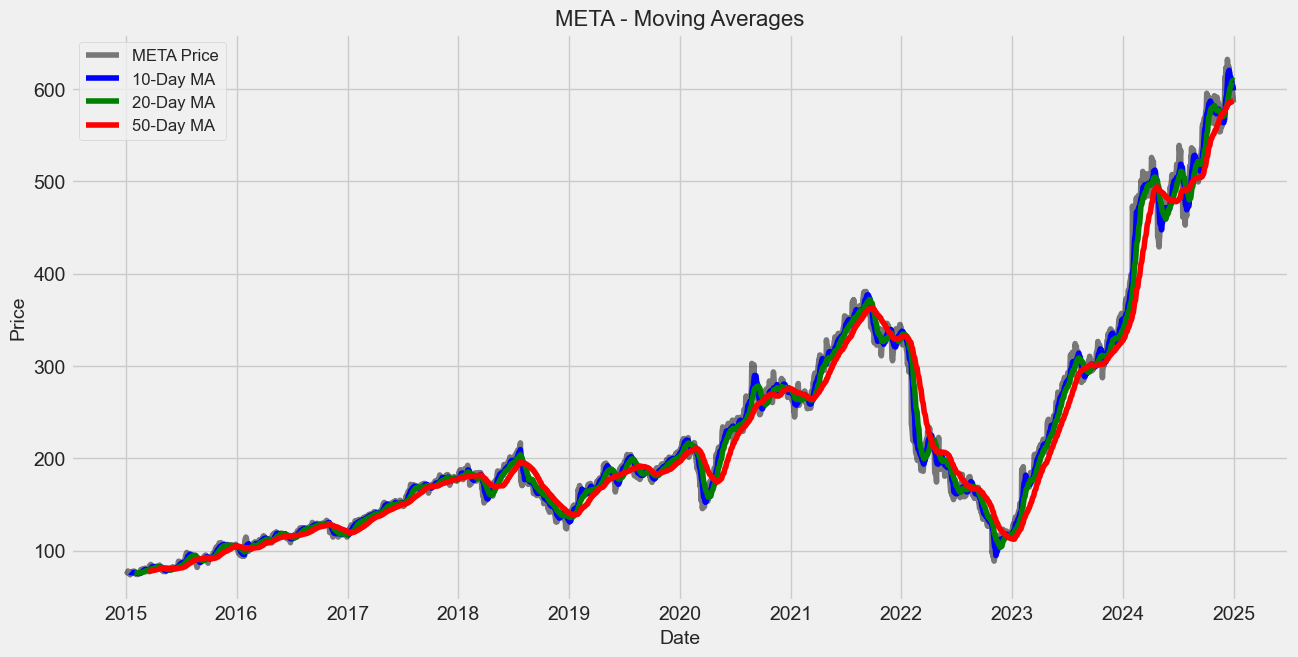

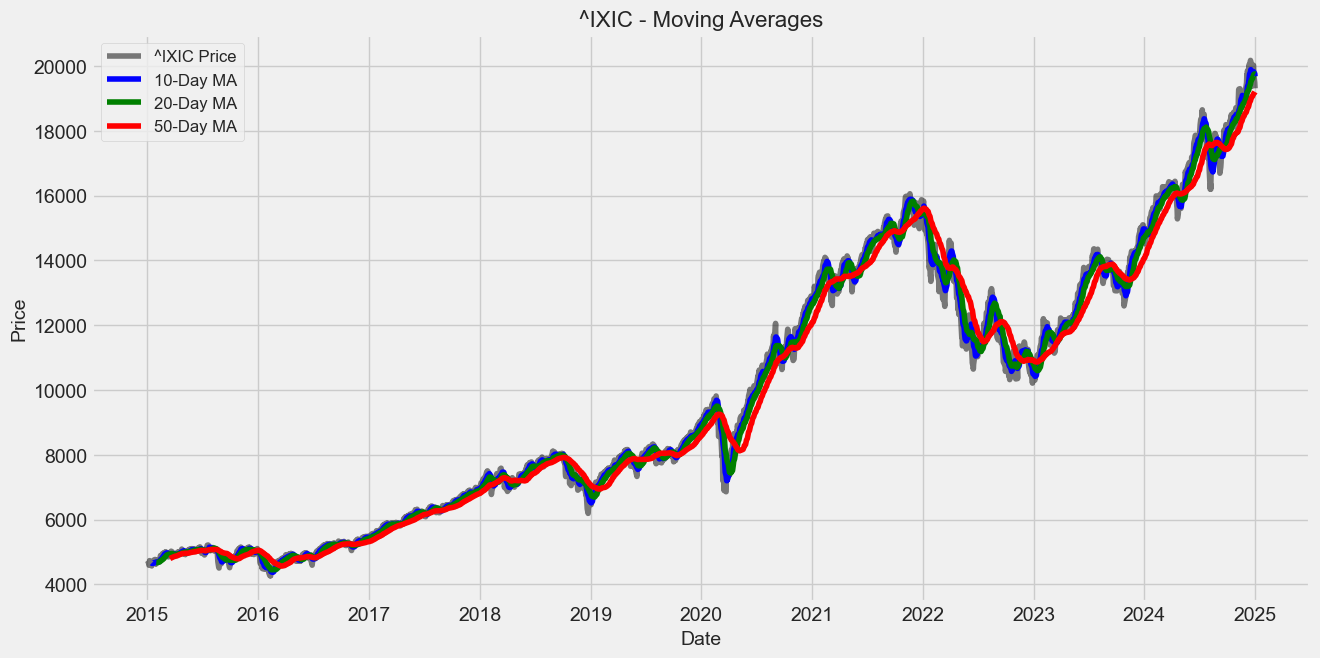

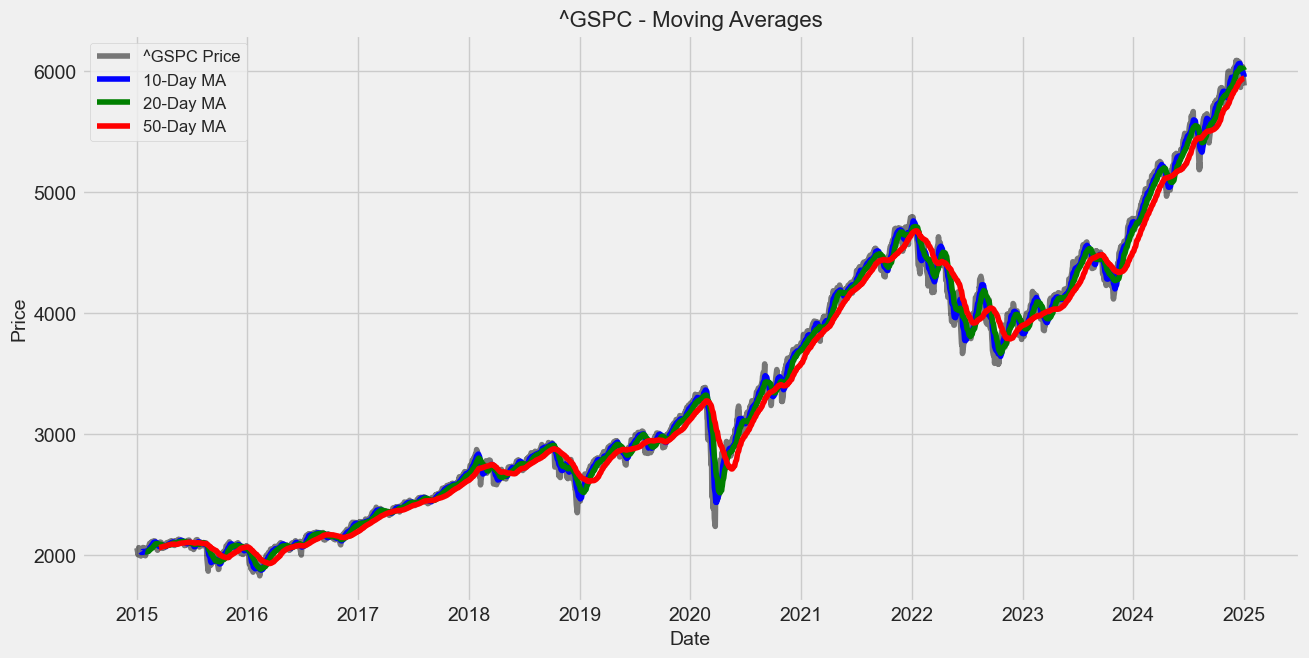

In [13]:
# Calculate moving averages
moving_averages = {
    '10_day': data.rolling(window=10).mean(),
    '20_day': data.rolling(window=20).mean(),
    '50_day': data.rolling(window=50).mean()
}

# Plot moving averages for each stock separately
for ticker in all_tickers:
    plt.figure(figsize=(14, 7))
    
    # Plot the adjusted closing price
    plt.plot(data.index, data[ticker], label=f'{ticker} Price', color='black', alpha=0.5)
    
    # Plot the moving averages
    plt.plot(moving_averages['10_day'].index, moving_averages['10_day'][ticker], label='10-Day MA', color='blue')
    plt.plot(moving_averages['20_day'].index, moving_averages['20_day'][ticker], label='20-Day MA', color='green')
    plt.plot(moving_averages['50_day'].index, moving_averages['50_day'][ticker], label='50-Day MA', color='red')
    
    # Add title and labels
    plt.title(f'{ticker} - Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [14]:
data.head()

Ticker,AAPL,GOOG,META,MSFT,TSLA,^GSPC,^IXIC
Date,,,,,,,
2015-01-02,24.320429,26.074965,78.151466,40.152485,14.620667,2058.199951,4726.810059
2015-01-05,23.635290,25.531416,76.896263,39.783241,14.006000,2020.579956,4652.569824
2015-01-06,23.637512,24.939671,75.860214,39.199322,14.085333,2002.609985,4592.740234
2015-01-07,23.968960,24.896944,75.860214,39.697380,14.063333,2025.900024,4650.470215
2015-01-08,24.889910,24.975443,77.882492,40.865200,14.041333,2062.139893,4736.189941


In [15]:
data = yf.download(tickers, start=start_date, end=end_date)['Close']

tech_rets = data.pct_change()
tech_rets.head()

[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,GOOG,META,MSFT,TSLA,^GSPC,^IXIC
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.020846,-0.016061,-0.009196,-0.042041,-0.018278,-0.015706
2015-01-06,0.000094,-0.023177,-0.013473,-0.014678,0.005664,-0.008893,-0.012859
2015-01-07,0.014022,-0.001713,0.000000,0.012706,-0.001562,0.011630,0.012570
2015-01-08,0.038423,0.003153,0.026658,0.029418,-0.001564,0.017888,0.018432


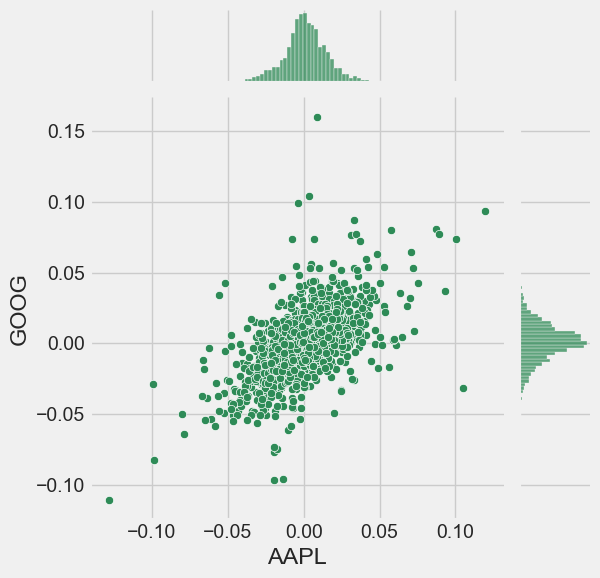

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='AAPL', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

In [17]:
import numpy as np

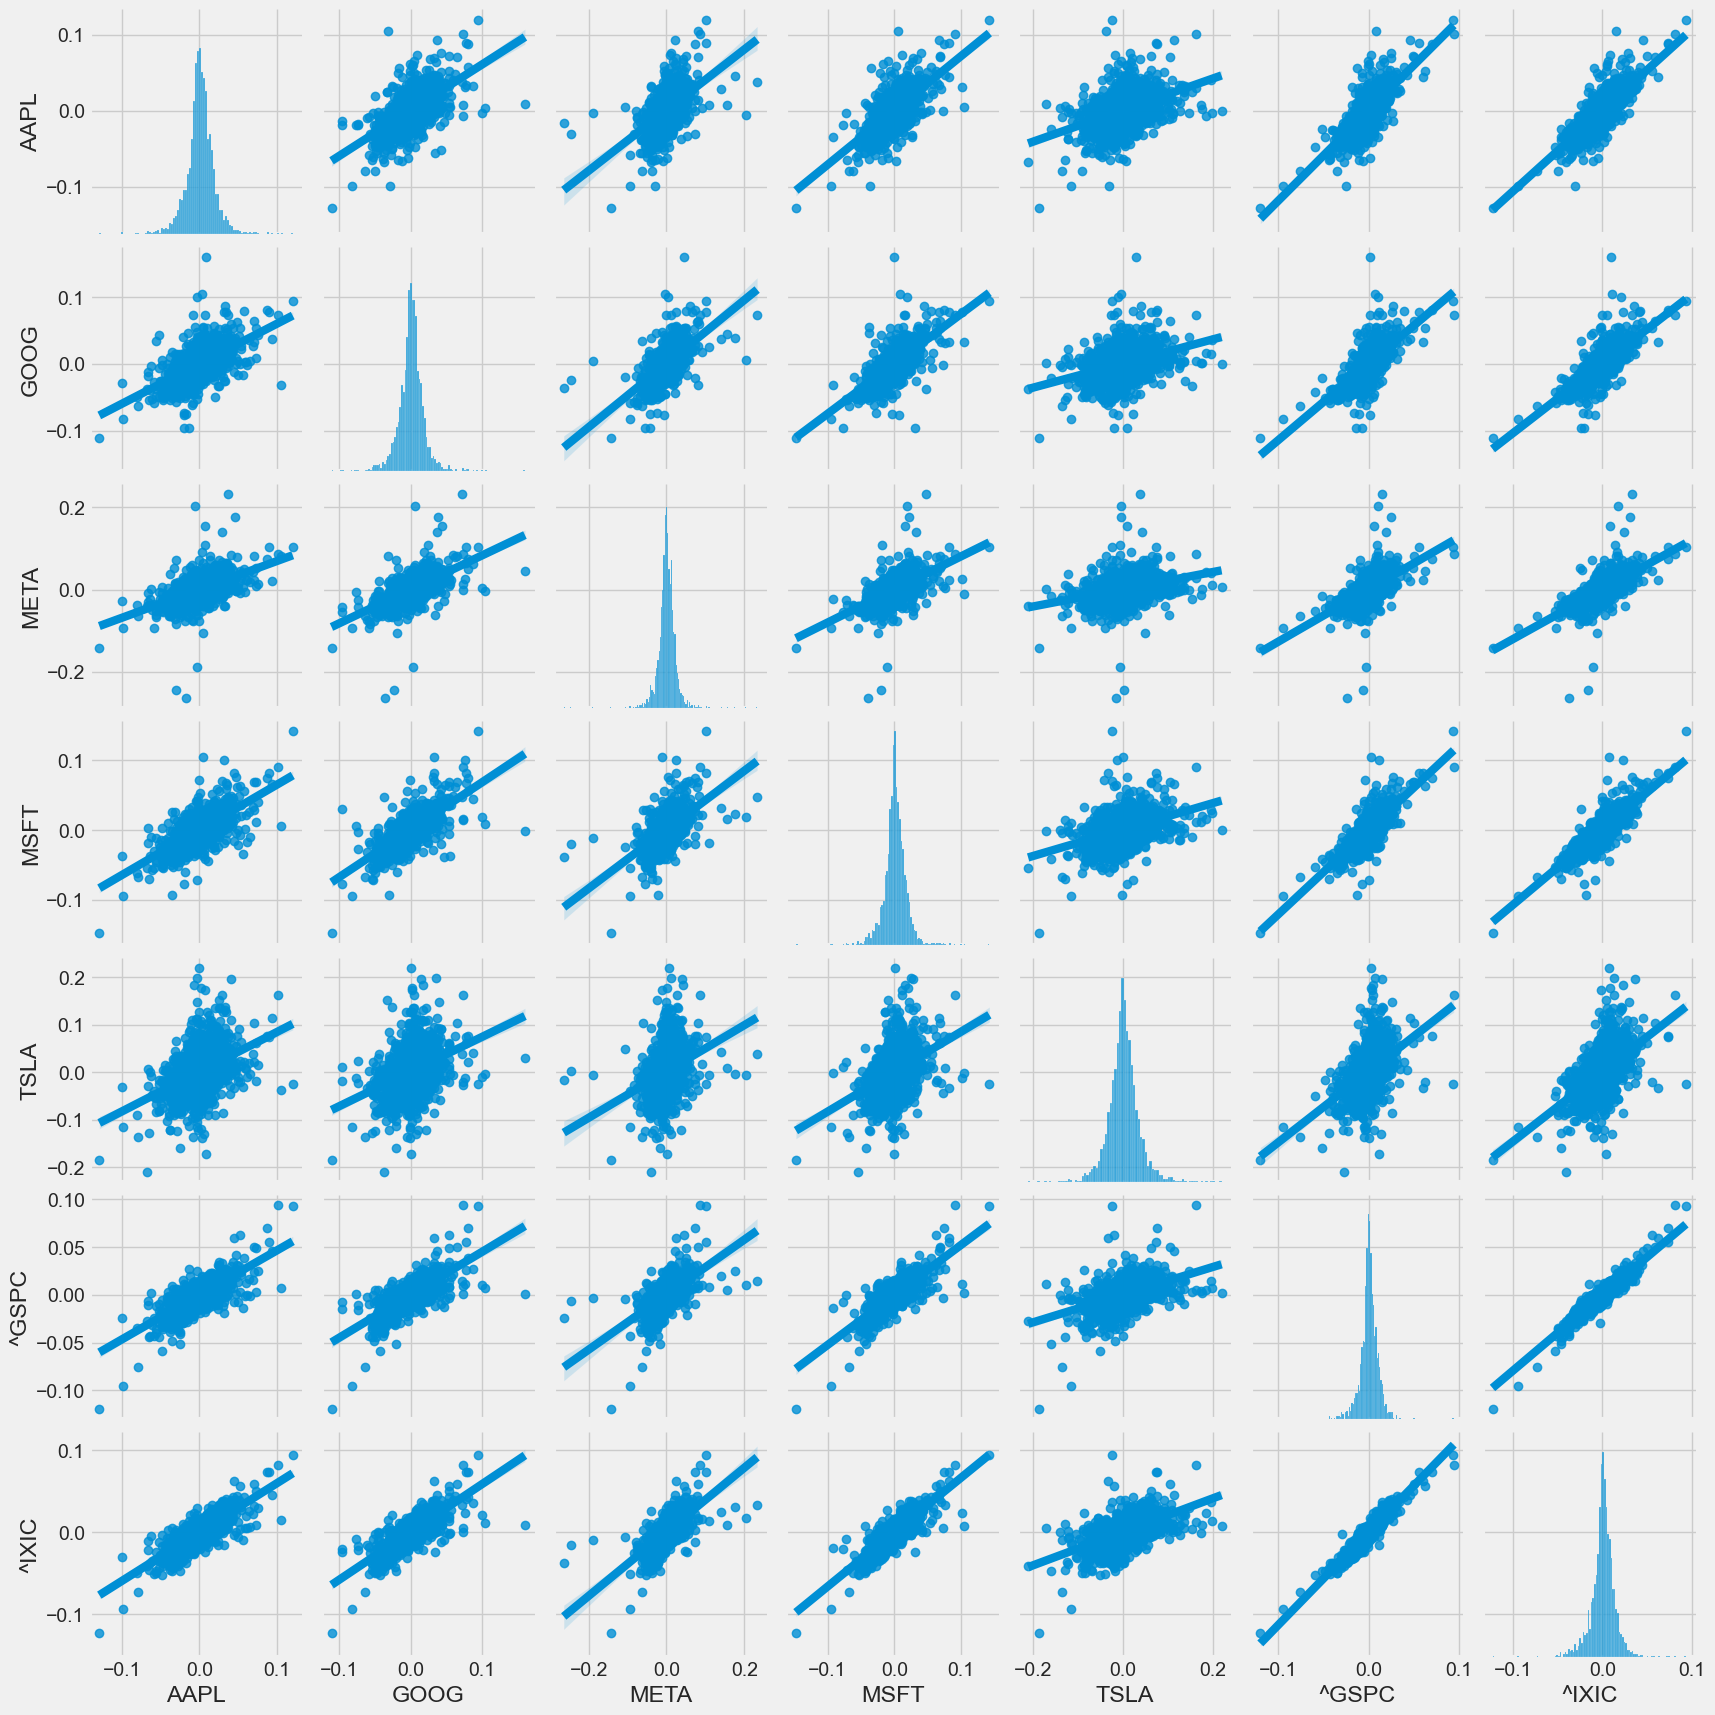

In [18]:
sns.pairplot(tech_rets, kind='reg')

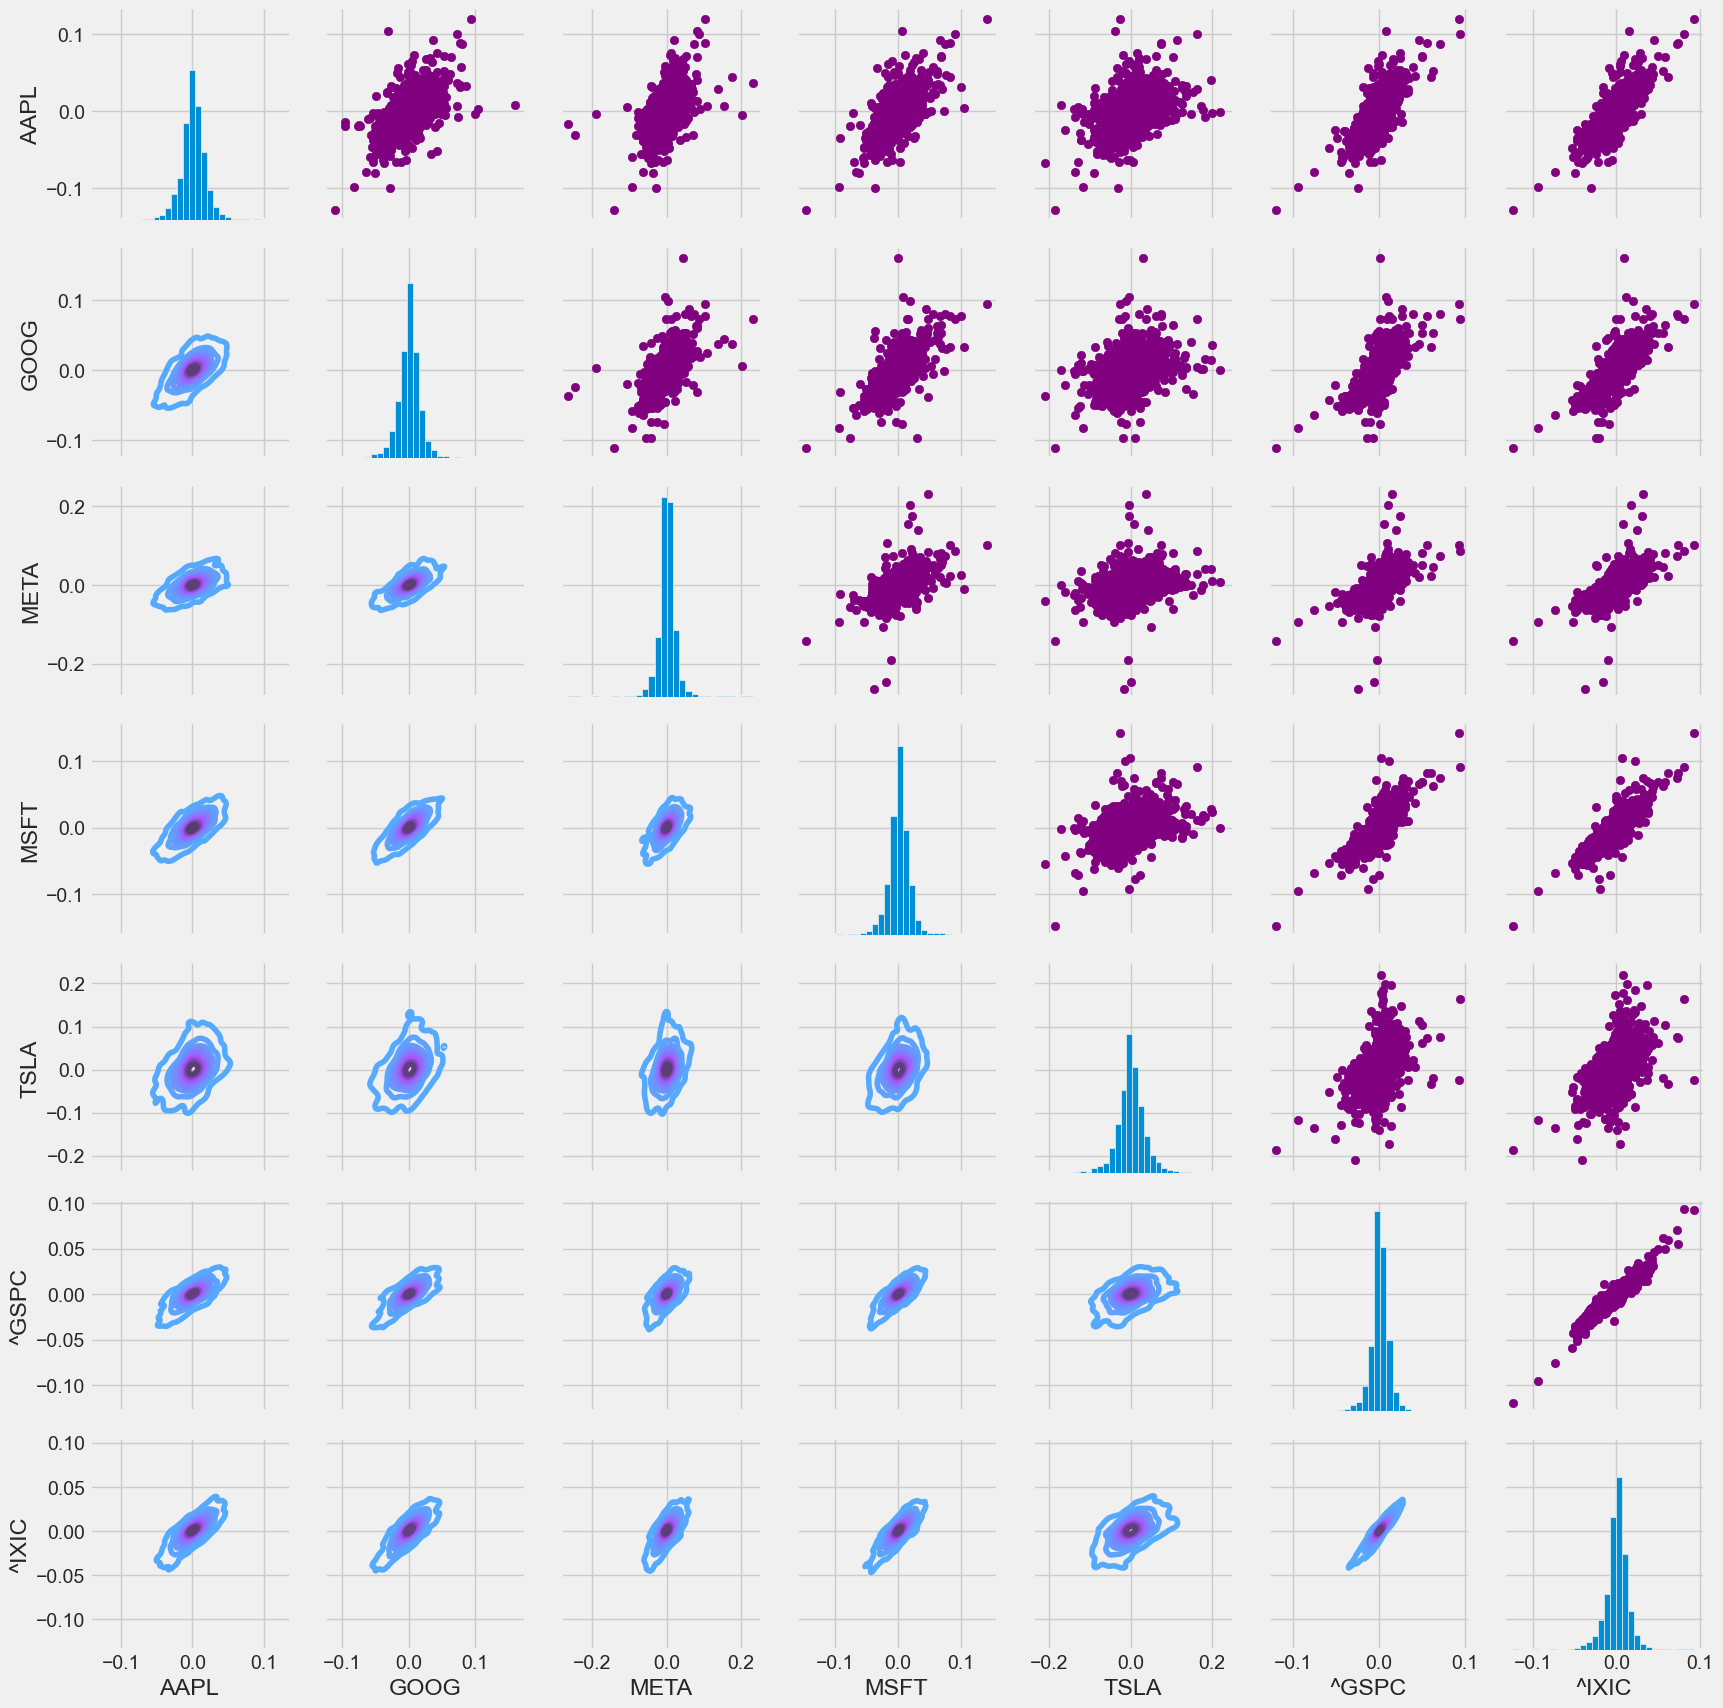

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

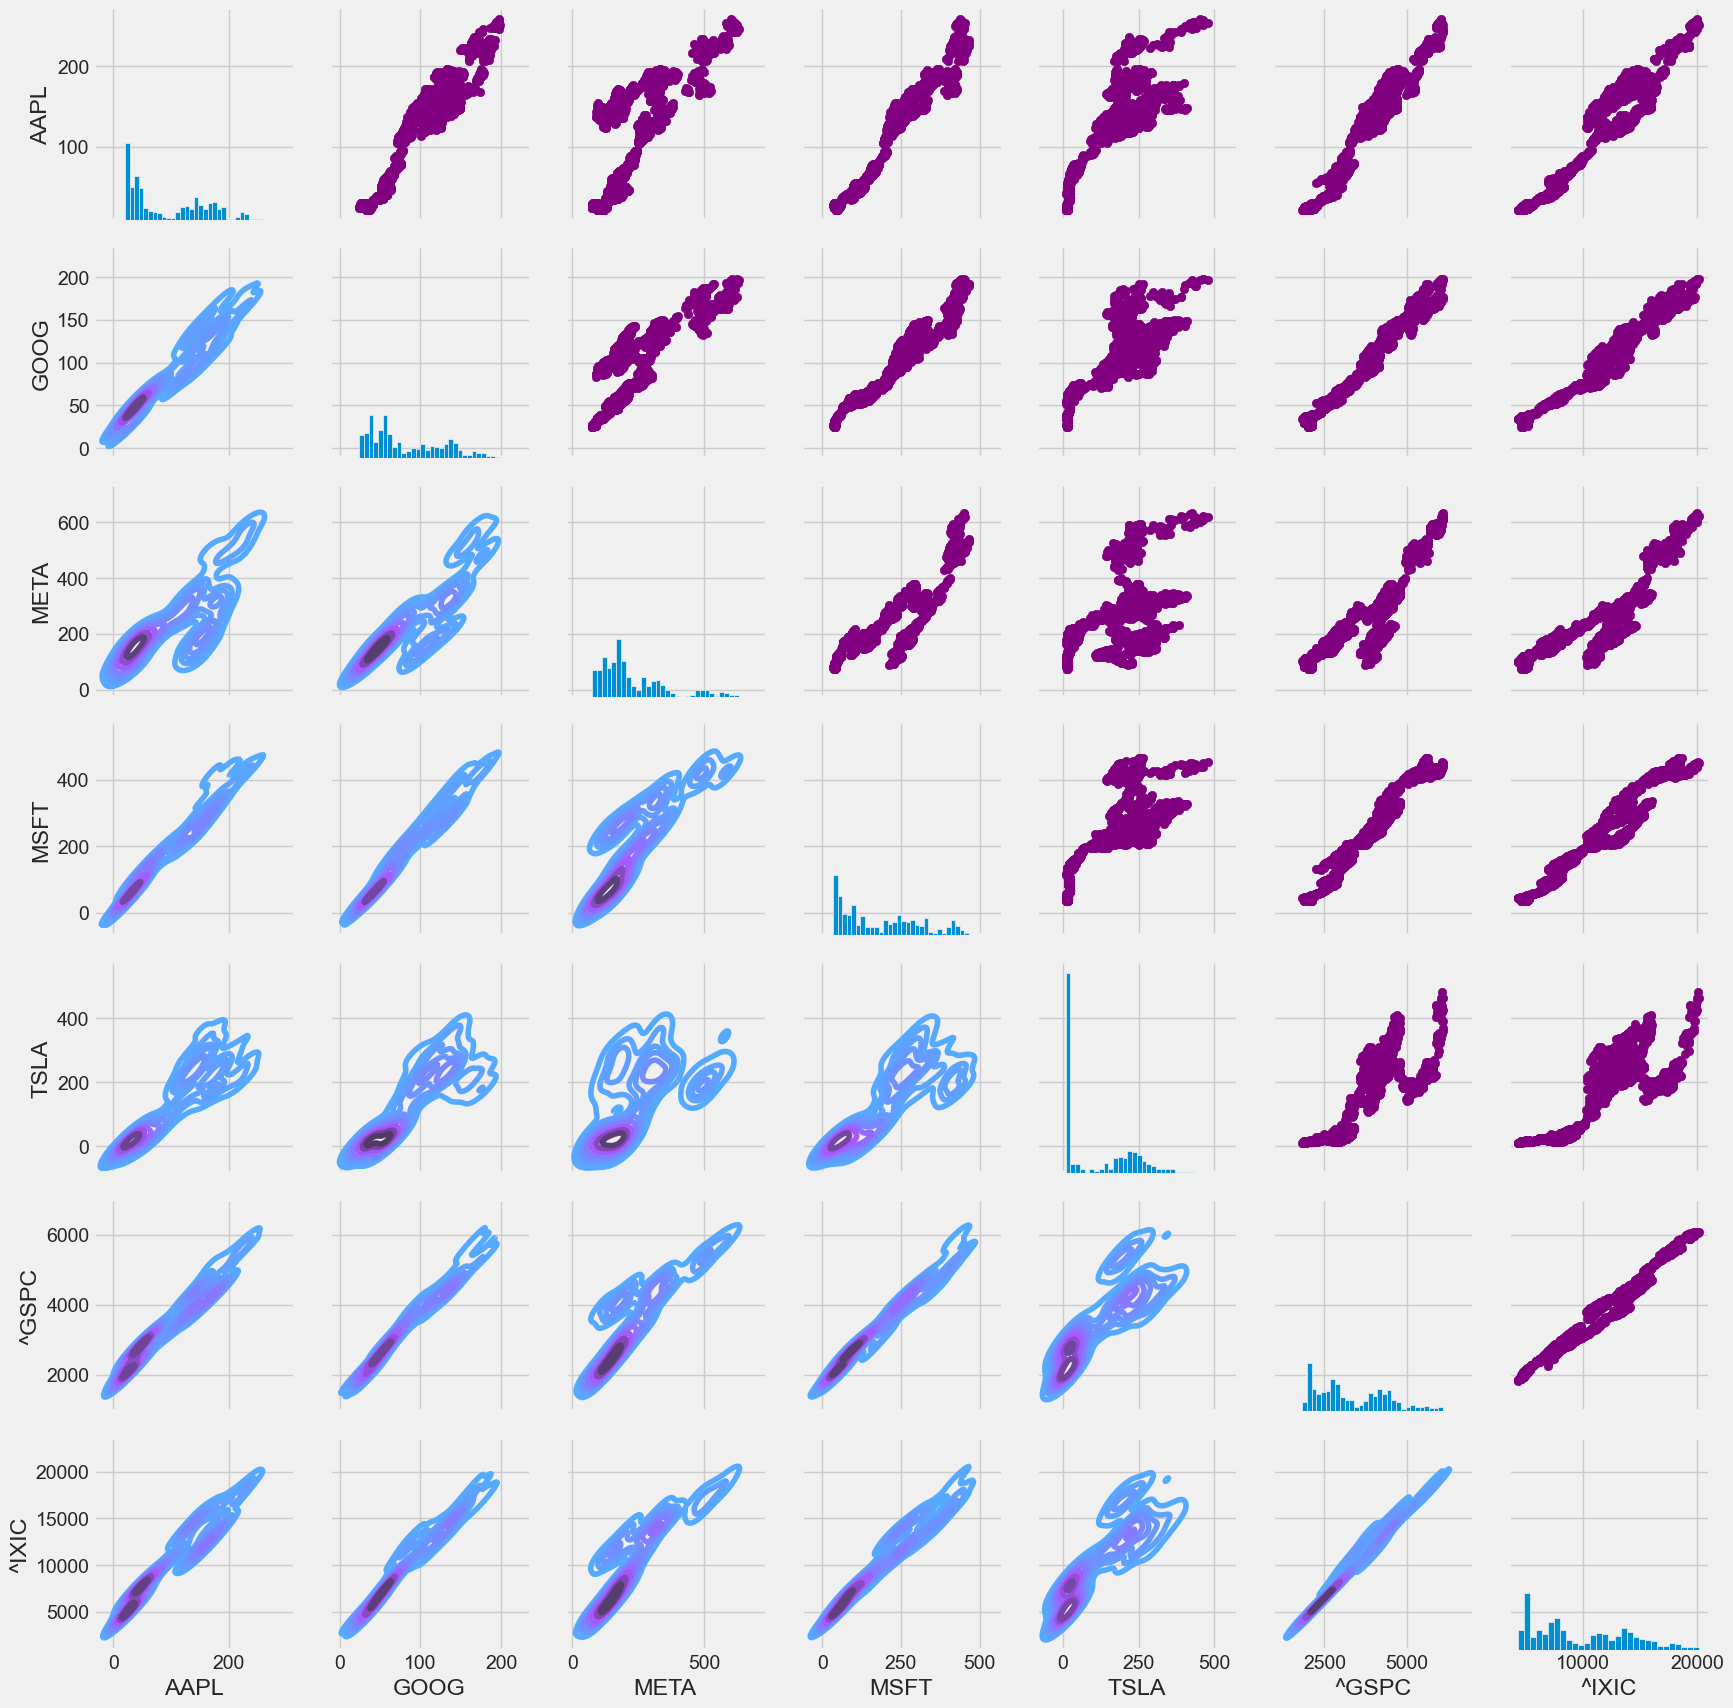

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(data)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

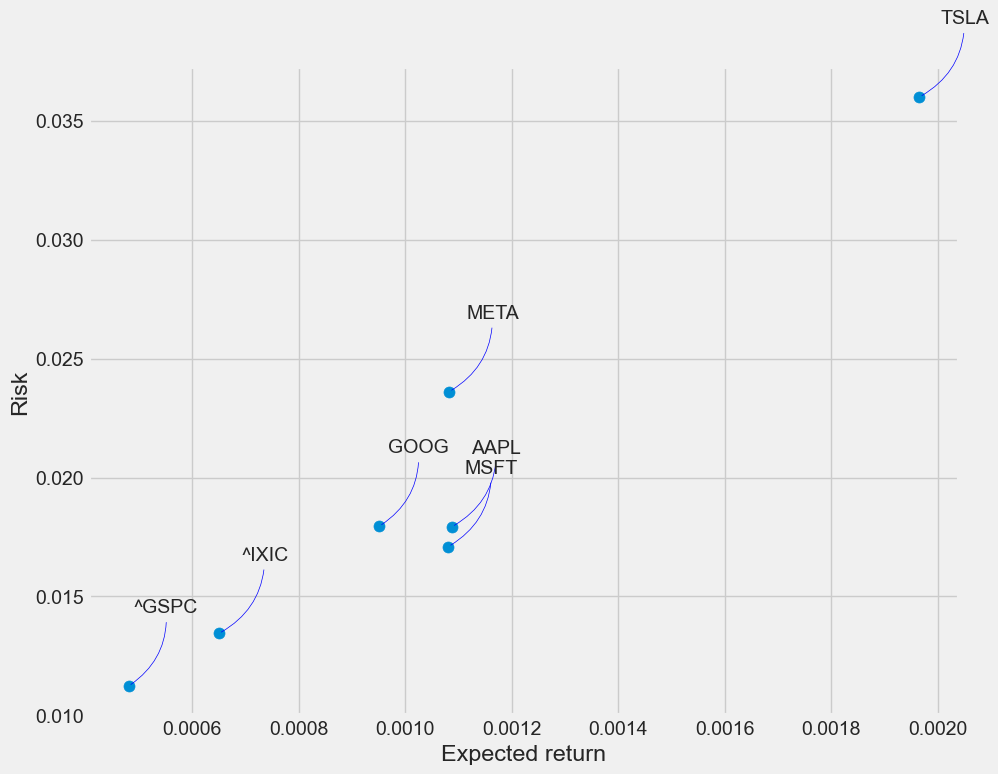

In [21]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))